### 基础认识：图像分类，手写数字识别。一般机器学习框架都使用MNIST手写体数字库作为入门。
### 就像"Hello World"对于任何一门编程语言一样，要想入门机器学习，
### 就先要掌握如何训练一个模型识别MNIST库中的手写数字。 
https://okai.brown.edu/zh/chapter0.html

每一个notebook都由下面三行开始；它们确保你对库代码进行任何编辑，这些代码都将自动重新加载，并且任何图表或图片能在notebook中展示。

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

我们首先导入所有需要的包，然后就可以使用构建于 [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163)之上的 [fastai V1库](http://www.fast.ai/2018/10/02/fastai-ai/)。fastai库提供了大量有用的函数，可以帮助我们简单快捷地构建神经网络，并且训练出我们的模型。

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/home/jetbot/.fastai/data/mnist_sample')

In [4]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

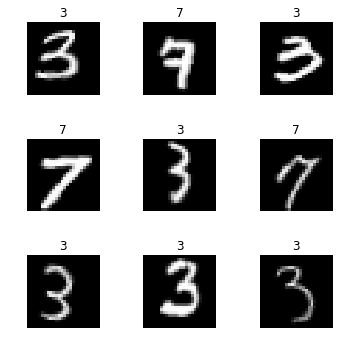

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['3', '7'], 2, 12396, 2038)

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [9]:
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.163485,0.083700,0.969578,00:52
1,0.107625,0.046680,0.984298,00:38


### 学习率退火算法
#### fit_one_cycle在训练中，先使用较大的学习率，在逐步减小学习率。
#### 首先，在学习的过程中逐步增大学习率目的是为了不至于陷入局部最小值，边学习边计算loss。
#### 其次，当loss曲线向上扬即变大的时候，开始减小学习率，慢慢的趋近梯度最小值，loss也会慢慢减小。

In [10]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.070733,0.040521,0.986752,00:38
1,0.069538,0.028421,0.989205,00:38


In [11]:
learn.save('stage-1')

### 参数调优可视化查找最佳学习率区间

In [ ]:
learn.load('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

In [ ]:
learn.save('stage-2')

### Interpretation 结果解读 模型准确率可视化评估

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))

#### 推理测试
你可能想用CPU来进行推断，除了大规模的（几乎可以肯定你不需要实时训练模型)，（所以）如果你没有GPU资源，你也可以使用CPU来对模型做简单的测试：

In [ ]:
defaults.device = torch.device('cpu')

In [12]:
img = open_image(path/'test'/'test.png')
img

In [13]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class


Category 3

In [14]:
outputs

tensor([9.9995e-01, 5.2270e-05])